Exercicios

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord, Distance
from astropy.io import fits
from astropy.table import QTable
from astropy.utils.data import download_file
from astroquery.gaia import Gaia
Gaia.ROW_LIMIT = 10000  # Define o limite de linhas para os dados retornados


In [20]:
ngc188_center = SkyCoord(12.11*u.deg, 85.26*u.deg)
ngc188_center

<SkyCoord (ICRS): (ra, dec) in deg
    (12.11, 85.26)>

In [21]:
ngc188_center = SkyCoord(12.11*u.deg, 85.26*u.deg, frame='icrs')
ngc188_center

<SkyCoord (ICRS): (ra, dec) in deg
    (12.11, 85.26)>

In [22]:
SkyCoord('00:48:26.4 85:15:36', unit=(u.hour, u.deg), 
         frame='icrs')

<SkyCoord (ICRS): (ra, dec) in deg
    (12.11, 85.26)>

In [23]:
ngc188_center = SkyCoord.from_name('NGC 188')
ngc188_center

<SkyCoord (ICRS): (ra, dec) in deg
    (11.798, 85.244)>

In [24]:
ngc188_center.ra, ngc188_center.dec

(<Longitude 11.798 deg>, <Latitude 85.244 deg>)

In [25]:
ngc188_center.ra

<Longitude 11.798 deg>

In [26]:
ngc188_center.dec

<Latitude 85.244 deg>

In [27]:
type(ngc188_center.ra), type(ngc188_center.dec)

(astropy.coordinates.angles.core.Longitude,
 astropy.coordinates.angles.core.Latitude)

In [28]:
(ngc188_center.ra.to(u.hourangle), 
 ngc188_center.ra.to(u.radian),
 ngc188_center.ra.to(u.degree))

(<Longitude 0.78653333 hourangle>,
 <Longitude 0.20591395 rad>,
 <Longitude 11.798 deg>)

In [29]:
(ngc188_center.ra.hour, 
 ngc188_center.ra.radian, 
 ngc188_center.ra.degree)

(0.7865333333333335, 0.205913945150291, 11.798)

In [30]:
ngc188_center.ra.to_string(unit=u.hourangle, sep=':', pad=True)

'00:47:11.52'

In [36]:
job = Gaia.cone_search_async(ngc188_center, radius=0.5*u.deg)
ngc188_table = job.get_results()

# manter apenas estrelas mais brilhantes do que a magnitude G=19
ngc188_table = ngc188_table[ngc188_table['phot_g_mean_mag'] < 19*u.mag]

INFO: Query finished. [astroquery.utils.tap.core]


In [40]:
# Coordenadas do centro do NGC 188
ngc_188_center = SkyCoord(ra=12.11, dec=85.26, unit=u.deg)

# Consulta ao catálogo do Gaia para recuperar as fontes próximas ao NGC 188
query = f"SELECT * FROM gaiadr2.gaia_source WHERE CONTAINS(POINT('ICRS', ra, dec), CIRCLE('ICRS', {ngc_188_center.ra.deg}, {ngc_188_center.dec.deg}, 1.0)) = 1"
result = Gaia.launch_job(query=query)
sources = result.get_data()


In [48]:
job = Gaia.cone_search_async(ngc188_center, radius=0.5*u.deg)
ngc188_table = job.get_results()

# only keep stars brighter than G=19 magnitude
ngc188_table = ngc188_table[ngc188_table['phot_g_mean_mag'] < 19*u.mag]

INFO: Query finished. [astroquery.utils.tap.core]


In [47]:
# Verificar as colunas disponíveis em ngc188_table
print(ngc188_table.columns)

<TableColumns names=('solution_id','DESIGNATION','SOURCE_ID','random_index','ref_epoch','ra','ra_error','dec','dec_error','parallax','parallax_error','parallax_over_error','pm','pmra','pmra_error','pmdec','pmdec_error','ra_dec_corr','ra_parallax_corr','ra_pmra_corr','ra_pmdec_corr','dec_parallax_corr','dec_pmra_corr','dec_pmdec_corr','parallax_pmra_corr','parallax_pmdec_corr','pmra_pmdec_corr','astrometric_n_obs_al','astrometric_n_obs_ac','astrometric_n_good_obs_al','astrometric_n_bad_obs_al','astrometric_gof_al','astrometric_chi2_al','astrometric_excess_noise','astrometric_excess_noise_sig','astrometric_params_solved','astrometric_primary_flag','nu_eff_used_in_astrometry','pseudocolour','pseudocolour_error','ra_pseudocolour_corr','dec_pseudocolour_corr','parallax_pseudocolour_corr','pmra_pseudocolour_corr','pmdec_pseudocolour_corr','astrometric_matched_transits','visibility_periods_used','astrometric_sigma5d_max','matched_transits','new_matched_transits','matched_transits_removed','ip

In [49]:
#corrigido nome da coluna
cols = [
    'SOURCE_ID',
    'ra',
    'dec',
    'parallax',
    'parallax_error',
    'pmra',
    'pmdec',
    'radial_velocity',
    'phot_g_mean_mag',
    'phot_bp_mean_mag',
    'phot_rp_mean_mag'
]

# Selecionar as colunas desejadas e escrever os resultados em um arquivo FITS
ngc188_table[cols].write('gaia_results.fits', overwrite=True)

In [53]:
ngc188_table = QTable.read('gaia_results.fits')

In [54]:
len(ngc188_table)

4851

In [55]:
ngc188_table['ra']

<Quantity [12.12843623, 12.09380826, 12.09833983, ...,  6.37482745,
           16.34669029,  9.27346794] deg>

In [56]:
ngc188_table['dec']

<Quantity [85.26076874, 85.26522635, 85.25443204, ..., 85.17082631,
           84.93486819, 85.69204998] deg>

In [57]:
ngc188_gaia_coords = SkyCoord(ngc188_table['ra'], ngc188_table['dec'])
ngc188_gaia_coords

<SkyCoord (ICRS): (ra, dec) in deg
    [(12.12843623, 85.26076874), (12.09380826, 85.26522635),
     (12.09833983, 85.25443204), ..., ( 6.37482745, 85.17082631),
     (16.34669029, 84.93486819), ( 9.27346794, 85.69204998)]>

EXERCICIOS:Create a SkyCoord for the center of the open cluster the Pleiades (either by looking up the coordinates and passing them in, or by using the convenience method we learned about above):

In [50]:
# Coordenadas das Pleiades (M45)
pleiades_center = SkyCoord.from_name('Pleiades')

# Imprime as coordenadas no formato 'HH:MM:SS.S DD:MM:SS.S'
print(pleiades_center.to_string('hmsdms', precision=1))

03h46m24.2s +24d06m50.4s


In [63]:
ngc188_center.to_string(style="hmsdms", sep=":", precision=1)

'00:48:26.4 +85:15:36.0'

In [64]:
ngc188_gaia_coords.separation(ngc188_center)

<Angle [0.00170632, 0.00539471, 0.00565081, ..., 0.48639468, 0.48642093,
        0.48641596] deg>

In [65]:
ngc188_center_3d = SkyCoord(12.11*u.deg, 85.26*u.deg, distance=1.96*u.kpc)

In [66]:
parallax_snr = ngc188_table['parallax'] / ngc188_table['parallax_error']
ngc188_table_3d = ngc188_table[parallax_snr > 10] 
len(ngc188_table_3d)

2423

In [67]:
Distance(parallax=1*u.mas)

<Distance 1000. pc>

In [68]:
gaia_dist = Distance(parallax=ngc188_table_3d['parallax'].filled(np.nan))

In [69]:
ngc188_coords_3d = SkyCoord(ra=ngc188_table_3d['ra'], 
                            dec=ngc188_table_3d['dec'],
                            distance=gaia_dist)
ngc188_coords_3d

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    [(12.12843623, 85.26076874, 1835.97420948),
     (12.09380826, 85.26522635, 2055.37631694),
     (12.09833983, 85.25443204, 1107.47843904), ...,
     ( 6.65666647, 85.09670573, 1935.70499692),
     (16.34669029, 84.93486819, 1152.20571167),
     ( 9.27346794, 85.69204998, 1457.67396286)]>

Text(0.5, 1.0, 'Gaia DR2 sources near NGC 188')

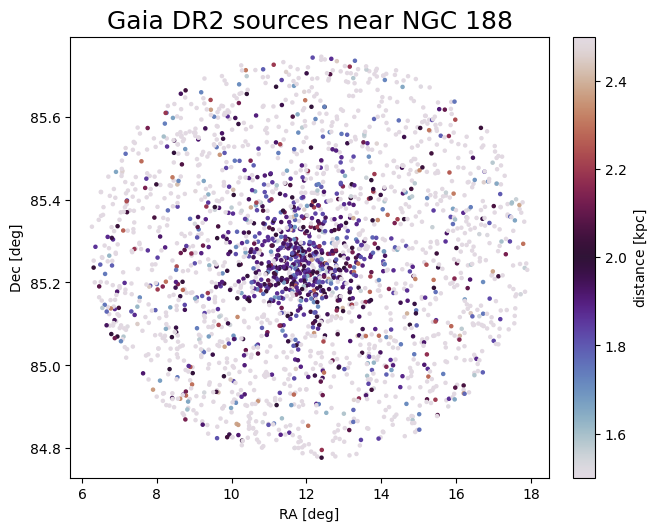

In [70]:
fig, ax = plt.subplots(figsize=(6.5, 5.2),
                       constrained_layout=True)
cs = ax.scatter(ngc188_coords_3d.ra.degree, 
                ngc188_coords_3d.dec.degree, 
                c=ngc188_coords_3d.distance.kpc, 
                s=5, vmin=1.5, vmax=2.5, cmap='twilight')
cb = fig.colorbar(cs)
cb.set_label(f'distance [{u.kpc:latex_inline}]')

ax.set_xlabel('RA [deg]')
ax.set_ylabel('Dec [deg]')

ax.set_title('Gaia DR2 sources near NGC 188', fontsize=18)

In [71]:
sep3d = ngc188_coords_3d.separation_3d(ngc188_center_3d)
sep3d

<Distance [124.02580339,  95.37650416, 852.52157335, ...,  29.38769699,
           807.89502901, 502.53095508] pc>

In [75]:
ngc188_3d_mask = sep3d < 50*u.pc
ngc188_3d_mask.sum()

258